# Risk Sensitivity Analysis

Deze notebook is voor het uitvoeren van een SA op risk weging.

In [21]:
import pandas as pd
import geopandas as gpd
import numpy as np
from SALib.analyze import sobol
from SALib.sample import saltelli 

from model_find_paths import connect_distribution_to_postnl

# Algemene risks

In [13]:
df = pd.read_csv("/Users/cmartens/Documents/thesis_cf_martens/risk_analysis/input/risk_scores.csv") 
# drop last 3 rows 
df = df.drop(df.index[-3:])


In [14]:
df

,area_type,Sf,Sp,Ss,L1,L2,L3,L4,L5,Height
0,Motorways and major roads,4.0,3.0,1.0,3.0,2.0,1.0,1.0,3.0,30.0
1,Regional roads,3.0,3.0,2.0,4.0,3.0,1.0,3.0,2.0,30.0
2,Tracks and rural access roads,2.0,2.0,1.0,2.0,1.0,3.0,2.0,2.0,30.0
3,Living and residential streets,3.0,4.0,4.0,5.0,4.0,1.0,5.0,3.0,30.0
4,Pedestrian and cycling paths,3.0,2.0,3.0,4.0,2.0,2.0,2.0,2.0,30.0
5,Railways,4.0,3.0,2.0,5.0,2.0,2.0,1.0,4.0,30.0
6,Power lines,1.0,4.0,1.0,2.0,2.0,3.0,1.0,5.0,60.0
7,Power plants,1.0,4.0,2.0,4.0,3.0,2.0,3.0,5.0,60.0
8,Communication towers,1.0,3.0,1.0,4.0,5.0,1.0,2.0,4.0,60.0
9,High infrastructures,1.0,3.0,2.0,4.0,2.0,1.0,3.0,3.0,60.0


In [15]:
# Aantal externe risicofactoren
n_factors = 5

# Bereken cumulatieve bijdrage per domein (zonder deling)
R_f_total = 0
R_p_total = 0

# Loop over externe risicofactoren
for i in range(1, n_factors + 1):
    # Bereken afzonderlijke fatality- en property-risicobijdragen
    df[f"R_if_{i}"] = df["Sf"] * df[f"L{i}"]
    df[f"R_ip_{i}"] = df["Sp"] * df[f"L{i}"]
    
    # Tel cumulatief op
    R_f_total += df[f"R_if_{i}"]
    R_p_total += df[f"R_ip_{i}"]

# Cumulatieve crash-gerelateerde risico's
df["R_f"] = R_f_total
df["R_p"] = R_p_total

# Sociaal risico (losstaand van risicofactoren)
df["R_s"] = df["Ss"]

# Normaliseer fatality, property en societal domeinen afzonderlijk
df["R_f_norm"] = (df["R_f"] - df["R_f"].min()) / (df["R_f"].max() - df["R_f"].min())
df["R_p_norm"] = (df["R_p"] - df["R_p"].min()) / (df["R_p"].max() - df["R_p"].min())
df["R_s_norm"] = (df["R_s"] - df["R_s"].min()) / (df["R_s"].max() - df["R_s"].min())

In [16]:
df

,area_type,Sf,Sp,Ss,L1,L2,L3,L4,L5,Height,...,R_if_4,R_ip_4,R_if_5,R_ip_5,R_f,R_p,R_s,R_f_norm,R_p_norm,R_s_norm
0,Motorways and major roads,4.0,3.0,1.0,3.0,2.0,1.0,1.0,3.0,30.0,...,4.0,3.0,12.0,9.0,40.0,30.0,1.0,0.548387,0.307692,0.000000
1,Regional roads,3.0,3.0,2.0,4.0,3.0,1.0,3.0,2.0,30.0,...,9.0,9.0,6.0,6.0,39.0,39.0,2.0,0.532258,0.423077,0.333333
2,Tracks and rural access roads,2.0,2.0,1.0,2.0,1.0,3.0,2.0,2.0,30.0,...,4.0,4.0,4.0,4.0,20.0,20.0,1.0,0.225806,0.179487,0.000000
3,Living and residential streets,3.0,4.0,4.0,5.0,4.0,1.0,5.0,3.0,30.0,...,15.0,20.0,9.0,12.0,54.0,72.0,4.0,0.774194,0.846154,1.000000
4,Pedestrian and cycling paths,3.0,2.0,3.0,4.0,2.0,2.0,2.0,2.0,30.0,...,6.0,4.0,6.0,4.0,36.0,24.0,3.0,0.483871,0.230769,0.666667
5,Railways,4.0,3.0,2.0,5.0,2.0,2.0,1.0,4.0,30.0,...,4.0,3.0,16.0,12.0,56.0,42.0,2.0,0.806452,0.461538,0.333333
6,Power lines,1.0,4.0,1.0,2.0,2.0,3.0,1.0,5.0,60.0,...,1.0,4.0,5.0,20.0,13.0,52.0,1.0,0.112903,0.589744,0.000000
7,Power plants,1.0,4.0,2.0,4.0,3.0,2.0,3.0,5.0,60.0,...,3.0,12.0,5.0,20.0,17.0,68.0,2.0,0.177419,0.794872,0.333333
8,Communication towers,1.0,3.0,1.0,4.0,5.0,1.0,2.0,4.0,60.0,...,2.0,6.0,4.0,12.0,16.0,48.0,1.0,0.161290,0.538462,0.000000
9,High infrastructures,1.0,3.0,2.0,4.0,2.0,1.0,3.0,3.0,60.0,...,3.0,9.0,3.0,9.0,13.0,39.0,2.0,0.112903,0.423077,0.333333


# SA op Fatality, Property, Societal Impact

In [17]:
sensitivity_weights = [
    ("Base",                          (0.4, 0.3, 0.3)),
    ("Increased fatality weight",     (0.5, 0.25, 0.25)),
    ("Decreased fatality weight",     (0.3, 0.35, 0.35)),
    ("Increased property weight",     (0.3, 0.4, 0.3)),
    ("Decreased property weight",     (0.4, 0.2, 0.4)),
    ("Increased societal weight",     (0.3, 0.3, 0.4)),
    ("Decreased societal weight",     (0.4, 0.4, 0.2)),
]

In [18]:
df_sa_1 = df.copy()

In [19]:
for name, (α_f, α_p, α_s) in sensitivity_weights:
    df_sa_1[f"{name}"] = α_f * df_sa_1["R_f_norm"] + α_p * df_sa_1["R_p_norm"] + α_s * df_sa_1["R_s_norm"]


In [20]:
df_sa_1

,area_type,Sf,Sp,Ss,L1,L2,L3,L4,L5,Height,...,R_f_norm,R_p_norm,R_s_norm,Base,Increased fatality weight,Decreased fatality weight,Increased property weight,Decreased property weight,Increased societal weight,Decreased societal weight
0,Motorways and major roads,4.0,3.0,1.0,3.0,2.0,1.0,1.0,3.0,30.0,...,0.548387,0.307692,0.000000,0.311663,0.351117,0.272208,0.287593,0.280893,0.256824,0.342432
1,Regional roads,3.0,3.0,2.0,4.0,3.0,1.0,3.0,2.0,30.0,...,0.532258,0.423077,0.333333,0.439826,0.455232,0.424421,0.428908,0.430852,0.419934,0.448801
2,Tracks and rural access roads,2.0,2.0,1.0,2.0,1.0,3.0,2.0,2.0,30.0,...,0.225806,0.179487,0.000000,0.144169,0.157775,0.130562,0.139537,0.126220,0.121588,0.162117
3,Living and residential streets,3.0,4.0,4.0,5.0,4.0,1.0,5.0,3.0,30.0,...,0.774194,0.846154,1.000000,0.863524,0.848635,0.878412,0.870720,0.878908,0.886104,0.848139
4,Pedestrian and cycling paths,3.0,2.0,3.0,4.0,2.0,2.0,2.0,2.0,30.0,...,0.483871,0.230769,0.666667,0.462779,0.466294,0.459264,0.437469,0.506369,0.481059,0.419189
5,Railways,4.0,3.0,2.0,5.0,2.0,2.0,1.0,4.0,30.0,...,0.806452,0.461538,0.333333,0.561042,0.601944,0.520141,0.526551,0.548222,0.513730,0.573863
6,Power lines,1.0,4.0,1.0,2.0,2.0,3.0,1.0,5.0,60.0,...,0.112903,0.589744,0.000000,0.222084,0.203888,0.240281,0.269768,0.163110,0.210794,0.281059
7,Power plants,1.0,4.0,2.0,4.0,3.0,2.0,3.0,5.0,60.0,...,0.177419,0.794872,0.333333,0.409429,0.370761,0.448098,0.471175,0.363275,0.425021,0.455583
8,Communication towers,1.0,3.0,1.0,4.0,5.0,1.0,2.0,4.0,60.0,...,0.161290,0.538462,0.000000,0.226055,0.215261,0.236849,0.263772,0.172208,0.209926,0.279901
9,High infrastructures,1.0,3.0,2.0,4.0,2.0,1.0,3.0,3.0,60.0,...,0.112903,0.423077,0.333333,0.272084,0.245554,0.298615,0.303102,0.263110,0.294127,0.281059


In [ ]:
sa_1_results = {}

for scenario, risk_col in sensitivity_weights:
    # Update edge risks per etype volgens de juiste kolom
    etype_to_risk = dict(zip(df["area_type"], df[risk_col]))
    for u, v, data in G.edges(data=True):
        etype = data.get("etype")
        if etype in etype_to_risk:
            data["risk"] = etype_to_risk[etype]
        if etype == "postnl_connector":
            data["risk"] = 0.0

    # Run path planning
    connected, not_connected = connect_distribution_to_postnl(G, alpha=1, method="dijkstra")
    sa_1_results[scenario] = connected

## SA 1: Beleidsmatige Wegingen: Fatality, Property, Societal Impact

In [ ]:
policy_weights = [
    ("Base",        (0.4, 0.3, 0.3)),
    ("Equal",       (1/3, 1/3, 1/3)),
    ("Fatality",    (0.6, 0.2, 0.2)),
    ("Property",    (0.2, 0.6, 0.2)),
    ("Societal",    (0.2, 0.2, 0.6))
]

# dit is beleidsanalyse, gevoeligheids analyse moet +/- 10%

In [155]:
# Aantal externe risicofactoren
n_factors = 5

# Bereken cumulatieve bijdrage per domein (zonder deling)
R_f_total = 0
R_p_total = 0

# Loop over externe risicofactoren
for i in range(1, n_factors + 1):
    # Bereken afzonderlijke fatality- en property-risicobijdragen
    df[f"R_if_{i}"] = df["Sf"] * df[f"L{i}"]
    df[f"R_ip_{i}"] = df["Sp"] * df[f"L{i}"]
    
    # Tel cumulatief op
    R_f_total += df[f"R_if_{i}"]
    R_p_total += df[f"R_ip_{i}"]

# Cumulatieve crash-gerelateerde risico's
df["R_f"] = R_f_total
df["R_p"] = R_p_total

# Sociaal risico (losstaand van risicofactoren)
df["R_s"] = df["Ss"]

# Normaliseer fatality, property en societal domeinen afzonderlijk
df["R_f_norm"] = (df["R_f"] - df["R_f"].min()) / (df["R_f"].max() - df["R_f"].min())
df["R_p_norm"] = (df["R_p"] - df["R_p"].min()) / (df["R_p"].max() - df["R_p"].min())
df["R_s_norm"] = (df["R_s"] - df["R_s"].min()) / (df["R_s"].max() - df["R_s"].min())


In [156]:
for name, (α_f, α_p, α_s) in policy_weights:
    df[f"risk_{name}"] = α_f * df["R_f_norm"] + α_p * df["R_p_norm"] + α_s * df["R_s_norm"]



In [157]:
df

,area_type,Sf,Sp,Ss,L1,L2,L3,L4,L5,Height,...,R_p,R_s,R_f_norm,R_p_norm,R_s_norm,risk_Base,risk_Equal,risk_Fatality,risk_Property,risk_Societal
0,Motorways and major roads,2.0,3.0,1.0,3.0,2.0,1.0,1.0,3.0,30.0,...,30.0,1.0,0.225806,0.307692,0.000000,0.182630,0.177833,0.197022,0.229777,0.106700
1,Regional roads,3.0,3.0,2.0,4.0,3.0,1.0,3.0,2.0,30.0,...,39.0,2.0,0.532258,0.423077,0.333333,0.439826,0.429556,0.470637,0.426964,0.391067
2,Tracks and rural access roads,2.0,2.0,1.0,2.0,1.0,3.0,2.0,2.0,30.0,...,20.0,1.0,0.225806,0.179487,0.000000,0.144169,0.135098,0.171381,0.152854,0.081059
3,Living and residential streets,3.0,4.0,4.0,5.0,4.0,1.0,5.0,3.0,30.0,...,72.0,4.0,0.774194,0.846154,1.000000,0.863524,0.873449,0.833747,0.862531,0.924069
4,Pedestrian and cycling paths,3.0,2.0,3.0,4.0,2.0,2.0,2.0,2.0,30.0,...,24.0,3.0,0.483871,0.230769,0.666667,0.462779,0.460436,0.469810,0.368569,0.542928
5,Railways,1.0,3.0,2.0,5.0,2.0,2.0,1.0,4.0,30.0,...,42.0,2.0,0.129032,0.461538,0.333333,0.290074,0.307968,0.236394,0.369396,0.318114
6,Bridges,3.0,2.0,2.0,4.0,2.0,1.0,1.0,3.0,30.0,...,22.0,2.0,0.435484,0.205128,0.333333,0.335732,0.324648,0.368983,0.276840,0.328122
7,Power lines,1.0,4.0,1.0,2.0,2.0,3.0,1.0,5.0,60.0,...,52.0,1.0,0.112903,0.589744,0.000000,0.222084,0.234216,0.185691,0.376427,0.140529
8,Power plants,1.0,4.0,2.0,4.0,3.0,2.0,3.0,5.0,60.0,...,68.0,2.0,0.177419,0.794872,0.333333,0.409429,0.435208,0.332093,0.579074,0.394458
9,Communication towers,1.0,3.0,1.0,4.0,5.0,1.0,2.0,4.0,60.0,...,48.0,1.0,0.161290,0.538462,0.000000,0.226055,0.233251,0.204467,0.355335,0.139950


In [158]:
import matplotlib.pyplot as plt

def plot_policy_etypes_stacked_barplot(df_etypes, top_n=None, figsize=(12, 6)):
    """
    Plot a stacked barplot of edge type usage per policy using a fixed color map.

    Args:
        df_etypes (pd.DataFrame): DataFrame with index=edge types, columns=policy names, values=counts.
        area_color_map (dict): Dictionary mapping edge types to HEX color codes.
        top_n (int, optional): If set, only the top N most-used etypes will be plotted.
        figsize (tuple): Size of the resulting plot.
    """
    # Copy and fill missing colors
    color_map = {
        # Infrastructuur
        'Motorways and major roads': '#E31A1C',       # felrood – druk verkeer
        'Regional roads': '#FC4E2A',                  # oranje – secundair verkeer
        'Tracks and rural access roads': '#FD8D3C',   # lichtoranje – landelijk
        'Living and residential streets': '#FEB24C',  # amber – wonen
        'Pedestrian and cycling paths': '#33A02C',    # felgroen – toegankelijk
        'Railways': '#6A3D9A',                        # paars – spoor
        'Bridges': '#1F78B4',                         # staalblauw – verbinding
        'Helipads': '#F0027F',                        # magenta – luchtverkeer
        'Airports and airfields': '#A6CEE3',          # lichtblauw – grote infrastructuur

        # Energie & communicatie
        'Power lines': '#B15928',                     # bruin – energie
        'Power plants': '#FF7F00',                    # oranje – risico
        'Wind turbines': '#CAB2D6',                   # lila – duurzaam
        'Communication towers': '#FB9A99',            # roze – zenders
        'High infrastructures': '#A6761D',            # donkerbruin – hoog

        # Gebouwd gebied
        'Industrial zones': '#377EB8',                # blauw – industrie
        'Commercial zones': '#984EA3',                # paars – commercieel
        'Retail zones': '#FFB300',                    # goudgeel – winkels
        'Residential areas': '#FFFF33',               # felgeel – wonen
        'Schools and universities': '#FDBF6F',        # lichtoranje – educatie
        'Hospitals': '#E41A1C',                       # felrood – urgentie
        'Care homes': '#FB8072',                      # zachtrood – zorg
        'Prisons': '#636363',                         # grijs – beperkt
        'Religious sites': '#FF69B4',                 # roze – symbolisch
        'Cemeteries': '#8B0000',                      # donkerrood – herdenking
        'Cultural sites': '#6A3D9A',                  # diep paars – cultuur

        # Openbare ruimte en natuur
        'Parks': '#4DAF4A',                           # helder groen – ontspanning
        'Recreational zones': '#66C2A5',              # turquoise – recreatie
        'Meadows and open grass': '#B2DF8A',          # lichtgroen – open
        'Forests and woodlands': '#1B9E77',           # donkergroen – bos
        'Agricultural lands': '#FFFFB3',              # lichtgeel – landelijk
        'Wetlands': '#A6CEE3',                        # lichtblauw – nat
        'Lakes and ponds': '#1F78B4',                 # blauw – water
        'Water reservoirs': '#00BFFF',                # helderblauw – wateropslag
        'Rivers, canals and streams': '#6BAED6',      # rivierblauw – stromend water
        'Natura2000 areas': '#005824',                # donkergroen – beschermd

        # Overig
        'connector': '#D3D3D3',                       # lichtgrijs – tussenstuk
        'No-fly zone': '#B22222'                      # vuurrood – verboden
    }



    for etype in df_etypes.index:
        if etype not in color_map:
            color_map[etype] = "#D3D3D3"  # fallback color for unknown types

    # Sort by total usage
    df_sorted = df_etypes.loc[df_etypes.sum(axis=1).sort_values(ascending=False).index]

    # Limit to top N etypes if specified
    if top_n is not None:
        df_sorted = df_sorted.head(top_n)

    # Map etypes to colors
    colors = [color_map.get(etype, "#D3D3D3") for etype in df_sorted.index]

    # Plot
    ax = df_sorted.T.plot(kind="bar", stacked=True, figsize=figsize, width=0.75, color=colors)

    ax.set_title("Edge Type Usage per Policy")
    ax.set_xlabel("Policy")
    ax.set_ylabel("Number of edges used in paths")
    ax.legend(title="Edge Type", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize='small')

    plt.tight_layout()
    plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.show()


## Breda

In [159]:
city = 'breda'
depot = ['Breda']

In [160]:
import pickle
import networkx as nx

with open(f'/Users/cmartens/Documents/Thesis/model/design/output/{city}.pkl', 'rb') as f:
    G = pickle.load(f)


In [161]:
policy_weights = [
    ("Base",        "risk_Base"),
    ("Equal",       "risk_Equal"),
    ("Fatality",    "risk_Fatality"),
    ("Property",    "risk_Property"),
    ("Societal",    "risk_Societal")
]

In [162]:
policy_results = {}

for policy_name, risk_col in policy_weights:
    # Update edge risks per etype volgens de juiste kolom
    etype_to_risk = dict(zip(df["area_type"], df[risk_col]))
    for u, v, data in G.edges(data=True):
        etype = data.get("etype")
        if etype in etype_to_risk:
            data["risk"] = etype_to_risk[etype]
        if etype == "postnl_connector":
            data["risk"] = 0.0

    # Run path planning
    connected, not_connected = connect_distribution_to_postnl(G, alpha=1, method="dijkstra")
    policy_results[policy_name] = connected

Distribution points: 1
PostNL points: 64
Alpha: 1, Method: dijkstra
Connected: 157648 → 0 | 3911.6 m | 185 nodes
Connected: 157648 → 1 | 6251.1 m | 241 nodes
Connected: 157648 → 2 | 9200.0 m | 372 nodes
Connected: 157648 → 3 | 6678.6 m | 281 nodes
Connected: 157648 → 4 | 10301.7 m | 385 nodes
Connected: 157648 → 5 | 5503.1 m | 215 nodes
Connected: 157648 → 6 | 4952.0 m | 203 nodes
Connected: 157648 → 7 | 5590.1 m | 261 nodes
Connected: 157648 → 8 | 3040.9 m | 97 nodes
No path: 9
Connected: 157648 → 10 | 5672.4 m | 274 nodes
Connected: 157648 → 11 | 8847.6 m | 405 nodes
Connected: 157648 → 12 | 4446.4 m | 166 nodes
Connected: 157648 → 13 | 6582.7 m | 286 nodes
Connected: 157648 → 14 | 9003.4 m | 400 nodes
Connected: 157648 → 15 | 10759.5 m | 550 nodes
Connected: 157648 → 16 | 7031.5 m | 297 nodes
Connected: 157648 → 17 | 3810.7 m | 173 nodes
Connected: 157648 → 18 | 3414.4 m | 121 nodes
Connected: 157648 → 19 | 3381.0 m | 124 nodes
Connected: 157648 → 20 | 6274.6 m | 263 nodes
Connected

In [163]:
import pandas as pd

summary_stats = []

for policy, results in policy_results.items():
    lengths = [r[2] for r in results]  # r[2] is de totale lengte
    summary_stats.append({
        "Policy": policy,
        "n_paths": len(lengths),
        "avg_length": np.mean(lengths),
        "min_length": np.min(lengths),
        "max_length": np.max(lengths)
    })

df_summary = pd.DataFrame(summary_stats).sort_values("avg_length")
print(df_summary)


     Policy  n_paths   avg_length  min_length    max_length
2  Fatality       63  6102.204504   911.01043  17607.874723
0      Base       63  6126.757770   911.01043  17607.874723
3  Property       63  6140.015937   911.01043  17607.874723
1     Equal       63  6144.836705   911.01043  17607.874723
4  Societal       63  6324.406189   880.61936  18271.384182


                                Base  Equal  Fatality  Property  Societal
postnl_connector                 126    126       126       126       126
Industrial zones                 194    194       194       194       197
Tracks and rural access roads   1329   1369      1302      1351      1730
Pedestrian and cycling paths     549    547       554       648       224
connector                       2723   2743      2711      2754      2863
Meadows and open grass          3781   3793      3821      3781      3735
Rivers, canals and streams      6439   6451      6361      6443      6352
Regional roads                   428    436       401       362       449
Bridges                           48     48        49        48        47
Forests and woodlands            132    142       120       141       469
Residential areas                 51     51        71        48        50
Motorways and major roads        190    198       183       189       270
Railways                          22  

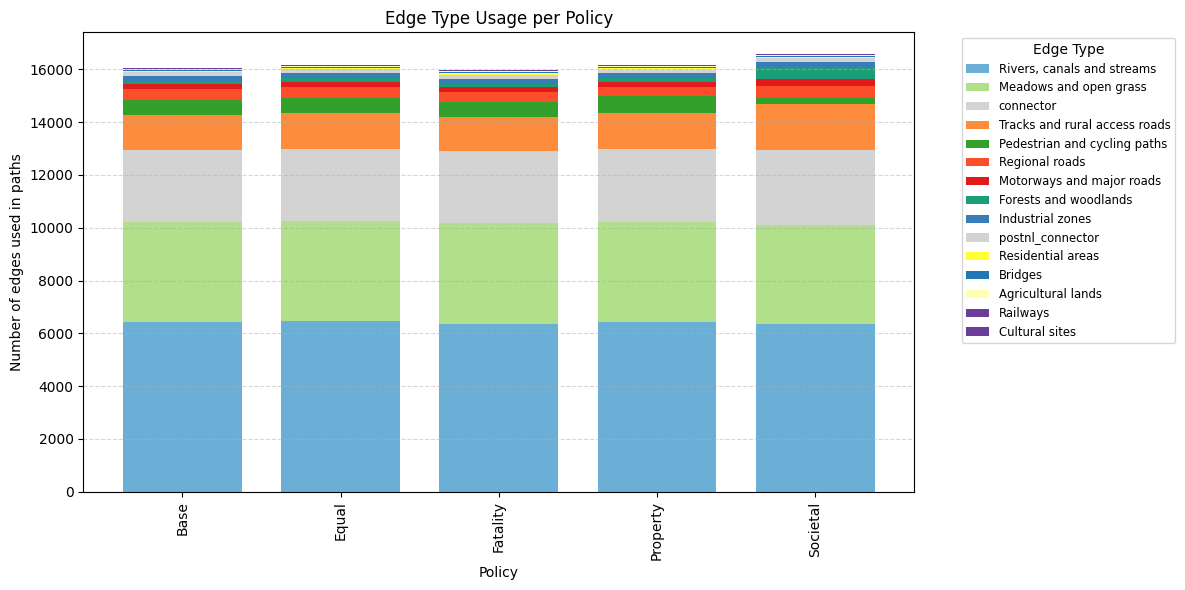

In [164]:
from collections import Counter

etype_counts = {}

for policy, results in policy_results.items():
    etypes = [etype for r in results for etype in r[-1]]  # r[-1] is de etype_array
    etype_counts[policy] = dict(Counter(etypes))

df_etypes = pd.DataFrame(etype_counts).fillna(0).astype(int)
print(df_etypes)
plot_policy_etypes_stacked_barplot(df_etypes, top_n=15)


In [165]:
policy_results = {}

for policy_name, risk_col in policy_weights:
    # Update edge risks per etype volgens de juiste kolom
    etype_to_risk = dict(zip(df["area_type"], df[risk_col]))
    for u, v, data in G.edges(data=True):
        etype = data.get("etype")
        if etype in etype_to_risk:
            data["risk"] = etype_to_risk[etype]
        if etype == "postnl_connector":
            data["risk"] = 0.0

    # Run path planning
    connected, not_connected = connect_distribution_to_postnl(G, alpha=0, method="dijkstra")
    policy_results[policy_name] = connected

Distribution points: 1
PostNL points: 64
Alpha: 0, Method: dijkstra
Connected: 157648 → 0 | 2079.8 m | 94 nodes
Connected: 157648 → 1 | 5407.4 m | 280 nodes
Connected: 157648 → 2 | 7085.8 m | 339 nodes
Connected: 157648 → 3 | 4837.4 m | 252 nodes
Connected: 157648 → 4 | 3482.5 m | 156 nodes
Connected: 157648 → 5 | 3119.8 m | 140 nodes
Connected: 157648 → 6 | 4252.2 m | 197 nodes
Connected: 157648 → 7 | 2862.1 m | 139 nodes
Connected: 157648 → 8 | 2628.0 m | 137 nodes
No path: 9
Connected: 157648 → 10 | 3133.6 m | 153 nodes
Connected: 157648 → 11 | 5955.6 m | 333 nodes
Connected: 157648 → 12 | 3128.4 m | 122 nodes
Connected: 157648 → 13 | 5313.4 m | 279 nodes
Connected: 157648 → 14 | 6433.3 m | 270 nodes
Connected: 157648 → 15 | 6167.5 m | 335 nodes
Connected: 157648 → 16 | 4948.7 m | 239 nodes
Connected: 157648 → 17 | 3455.9 m | 192 nodes
Connected: 157648 → 18 | 3155.5 m | 179 nodes
Connected: 157648 → 19 | 2854.6 m | 130 nodes
Connected: 157648 → 20 | 4479.7 m | 213 nodes
Connected: 

In [166]:
import pandas as pd

summary_stats = []

for policy, results in policy_results.items():
    lengths = [r[2] for r in results]  # r[2] is de totale lengte
    summary_stats.append({
        "Policy": policy,
        "n_paths": len(lengths),
        "avg_length": np.mean(lengths),
        "min_length": np.min(lengths),
        "max_length": np.max(lengths)
    })

df_summary = pd.DataFrame(summary_stats).sort_values("avg_length")
print(df_summary)


     Policy  n_paths   avg_length  min_length    max_length
0      Base       63  4167.008507  860.770111  14394.973194
1     Equal       63  4167.008507  860.770111  14394.973194
2  Fatality       63  4167.008507  860.770111  14394.973194
3  Property       63  4167.008507  860.770111  14394.973194
4  Societal       63  4167.008507  860.770111  14394.973194


                                Base  Equal  Fatality  Property  Societal
postnl_connector                 126    126       126       126       126
Industrial zones                 196    196       196       196       196
Tracks and rural access roads   1437   1437      1437      1437      1437
Pedestrian and cycling paths    4428   4428      4428      4428      4428
connector                        616    616       616       616       616
Forests and woodlands            141    141       141       141       141
Meadows and open grass           720    720       720       720       720
Regional roads                  3788   3788      3788      3788      3788
Motorways and major roads         82     82        82        82        82
Cultural sites                    88     88        88        88        88
Rivers, canals and streams       813    813       813       813       813
Schools and universities          53     53        53        53        53
Residential areas                 32  

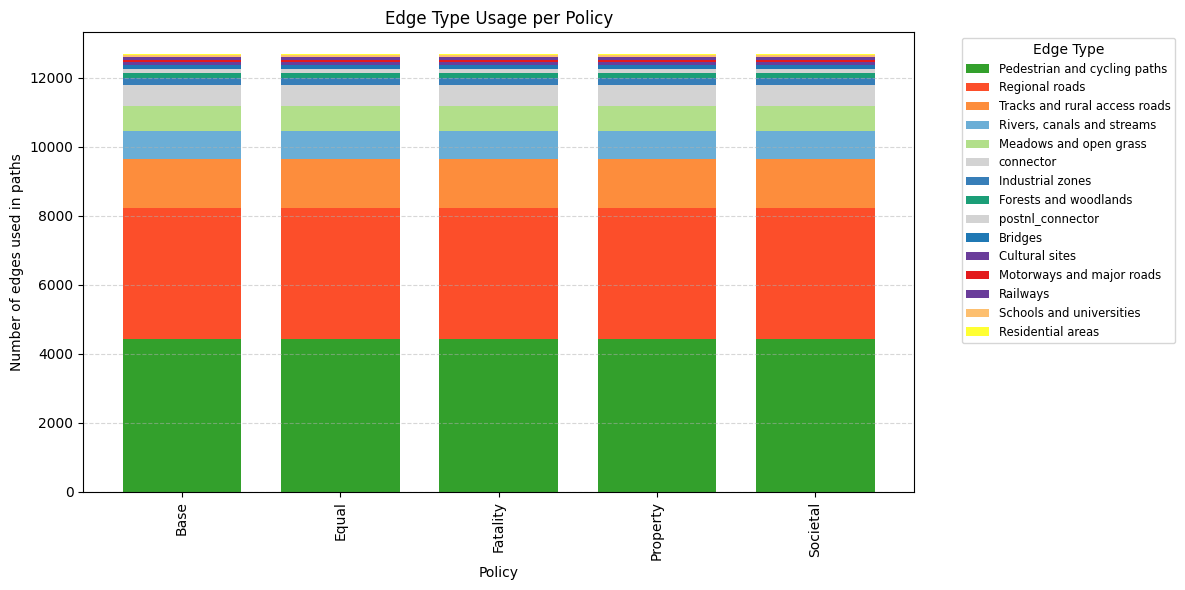

In [167]:
from collections import Counter

etype_counts = {}

for policy, results in policy_results.items():
    etypes = [etype for r in results for etype in r[-1]]  # r[-1] is de etype_array
    etype_counts[policy] = dict(Counter(etypes))

df_etypes = pd.DataFrame(etype_counts).fillna(0).astype(int)
print(df_etypes)
plot_policy_etypes_stacked_barplot(df_etypes, top_n=15)


## Borsele

In [168]:
city = 'borsele'
depot = ['Goes']

In [169]:
import pickle
import networkx as nx

with open(f'/Users/cmartens/Documents/Thesis/model/design/output/{city}_distribution_linked_manually.pkl', 'rb') as f:
    G = pickle.load(f)


In [170]:
policy_weights = [
    ("Base",        "risk_Base"),
    ("Equal",       "risk_Equal"),
    ("Fatality",    "risk_Fatality"),
    ("Property",    "risk_Property"),
    ("Societal",    "risk_Societal")
]

In [171]:
policy_results = {}

for policy_name, risk_col in policy_weights:
    # Update edge risks per etype volgens de juiste kolom
    etype_to_risk = dict(zip(df["area_type"], df[risk_col]))
    for u, v, data in G.edges(data=True):
        etype = data.get("etype")
        if etype in etype_to_risk:
            data["risk"] = etype_to_risk[etype]
        if etype == "postnl_connector":
            data["risk"] = 0.0

    # Run path planning
    connected, not_connected = connect_distribution_to_postnl(G, alpha=1, method="dijkstra")
    policy_results[policy_name] = connected

Distribution points: 1
PostNL points: 23
Alpha: 1, Method: dijkstra
Connected: 166248 → 0 | 13124.0 m | 432 nodes
Connected: 166248 → 1 | 15545.3 m | 500 nodes
Connected: 166248 → 2 | 14689.7 m | 474 nodes
Connected: 166248 → 3 | 20521.1 m | 651 nodes
Connected: 166248 → 4 | 6288.3 m | 228 nodes
No path: 5
Connected: 166248 → 6 | 3263.5 m | 116 nodes
Connected: 166248 → 7 | 11507.4 m | 388 nodes
Connected: 166248 → 8 | 11331.3 m | 354 nodes
Connected: 166248 → 9 | 15221.8 m | 494 nodes
Connected: 166248 → 10 | 12769.0 m | 414 nodes
Connected: 166248 → 11 | 21117.3 m | 664 nodes
Connected: 166248 → 12 | 14475.3 m | 440 nodes
Connected: 166248 → 13 | 21880.2 m | 714 nodes
Connected: 166248 → 14 | 22659.6 m | 729 nodes
Connected: 166248 → 15 | 6892.3 m | 216 nodes
Connected: 166248 → 16 | 5412.0 m | 189 nodes
Connected: 166248 → 17 | 9459.6 m | 284 nodes
Connected: 166248 → 18 | 21704.6 m | 731 nodes
Connected: 166248 → 19 | 14867.0 m | 502 nodes
Connected: 166248 → 20 | 13736.0 m | 465 n

In [172]:
import pandas as pd

summary_stats = []

for policy, results in policy_results.items():
    lengths = [r[2] for r in results]  # r[2] is de totale lengte
    summary_stats.append({
        "Policy": policy,
        "n_paths": len(lengths),
        "avg_length": np.mean(lengths),
        "min_length": np.min(lengths),
        "max_length": np.max(lengths)
    })

df_summary = pd.DataFrame(summary_stats).sort_values("avg_length")
print(df_summary)


     Policy  n_paths    avg_length   min_length    max_length
2  Fatality       21  13911.732088  3129.723044  22434.500689
0      Base       21  14194.876688  3263.474400  22659.568648
1     Equal       21  14224.556026  3263.474400  22659.568648
4  Societal       21  14421.913417  3875.623245  22700.051151
3  Property       21  14696.119743  3262.941930  23941.193006


                               Base  Equal  Fatality  Property  Societal
postnl_connector                 42     42        42        42        42
Meadows and open grass         7035   7093      6820      7698      7084
Agricultural lands              838    825       972       544       889
connector                       876    891       836      1067       934
Pedestrian and cycling paths     69     68        67        84        43
Tracks and rural access roads   514    521       469       574       545
Wetlands                         50     50        60        40        50
Forests and woodlands            88     88        50        68        92
Residential areas                32     32        45        34        20
Regional roads                  130    130       108       160       149
Retail zones                      1      1         1         1         1
Rivers, canals and streams        9     11         8        12        12
Motorways and major roads         5      5         

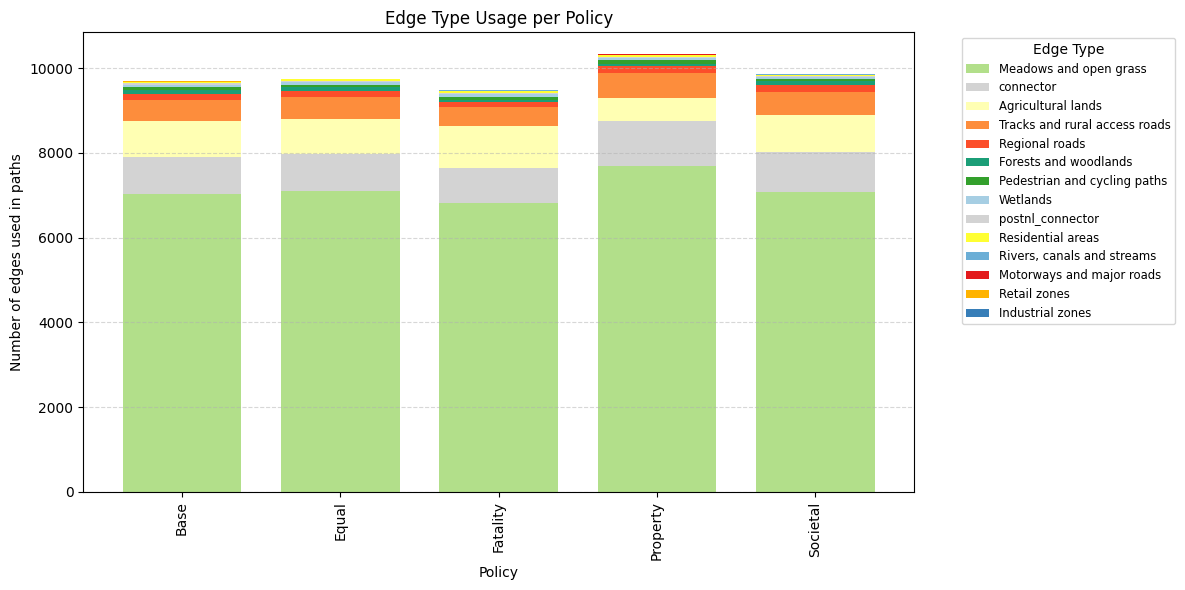

In [173]:
from collections import Counter

etype_counts = {}

for policy, results in policy_results.items():
    etypes = [etype for r in results for etype in r[-1]]  # r[-1] is de etype_array
    etype_counts[policy] = dict(Counter(etypes))

df_etypes = pd.DataFrame(etype_counts).fillna(0).astype(int)
print(df_etypes)
plot_policy_etypes_stacked_barplot(df_etypes, top_n=15)

In [174]:
policy_results = {}

for policy_name, risk_col in policy_weights:
    # Update edge risks per etype volgens de juiste kolom
    etype_to_risk = dict(zip(df["area_type"], df[risk_col]))
    for u, v, data in G.edges(data=True):
        etype = data.get("etype")
        if etype in etype_to_risk:
            data["risk"] = etype_to_risk[etype]
        if etype == "postnl_connector":
            data["risk"] = 0.0

    # Run path planning
    connected, not_connected = connect_distribution_to_postnl(G, alpha=0, method="dijkstra")
    policy_results[policy_name] = connected

Distribution points: 1
PostNL points: 23
Alpha: 0, Method: dijkstra
Connected: 166248 → 0 | 6514.6 m | 173 nodes
Connected: 166248 → 1 | 7059.5 m | 197 nodes
Connected: 166248 → 2 | 11000.8 m | 364 nodes
Connected: 166248 → 3 | 14132.0 m | 367 nodes
Connected: 166248 → 4 | 4044.8 m | 115 nodes
No path: 5
Connected: 166248 → 6 | 2211.5 m | 75 nodes
Connected: 166248 → 7 | 8086.9 m | 215 nodes
Connected: 166248 → 8 | 9414.9 m | 304 nodes
Connected: 166248 → 9 | 10174.1 m | 311 nodes
Connected: 166248 → 10 | 10346.7 m | 246 nodes
Connected: 166248 → 11 | 15151.5 m | 458 nodes
Connected: 166248 → 12 | 10907.6 m | 253 nodes
Connected: 166248 → 13 | 11067.3 m | 269 nodes
Connected: 166248 → 14 | 12961.3 m | 403 nodes
Connected: 166248 → 15 | 4296.8 m | 154 nodes
Connected: 166248 → 16 | 4019.3 m | 136 nodes
Connected: 166248 → 17 | 5141.9 m | 166 nodes
Connected: 166248 → 18 | 11841.6 m | 318 nodes
Connected: 166248 → 19 | 7126.6 m | 216 nodes
Connected: 166248 → 20 | 6420.3 m | 160 nodes
No

In [175]:
import pandas as pd

summary_stats = []

for policy, results in policy_results.items():
    lengths = [r[2] for r in results]  # r[2] is de totale lengte
    summary_stats.append({
        "Policy": policy,
        "n_paths": len(lengths),
        "avg_length": np.mean(lengths),
        "min_length": np.min(lengths),
        "max_length": np.max(lengths)
    })

df_summary = pd.DataFrame(summary_stats).sort_values("avg_length")
print(df_summary)


     Policy  n_paths   avg_length   min_length    max_length
0      Base       21  8747.396314  2211.458215  15151.469747
1     Equal       21  8747.396314  2211.458215  15151.469747
2  Fatality       21  8747.396314  2211.458215  15151.469747
3  Property       21  8747.396314  2211.458215  15151.469747
4  Societal       21  8747.396314  2211.458215  15151.469747


                               Base  Equal  Fatality  Property  Societal
postnl_connector                 42     42        42        42        42
Meadows and open grass          793    793       793       793       793
Agricultural lands             1153   1153      1153      1153      1153
connector                       252    252       252       252       252
Power lines                       9      9         9         9         9
Wetlands                         30     30        30        30        30
Rivers, canals and streams       13     13        13        13        13
Tracks and rural access roads   692    692       692       692       692
Regional roads                 1682   1682      1682      1682      1682
Retail zones                      1      1         1         1         1
Pedestrian and cycling paths    430    430       430       430       430
Railways                         61     61        61        61        61
Forests and woodlands            18     18        1

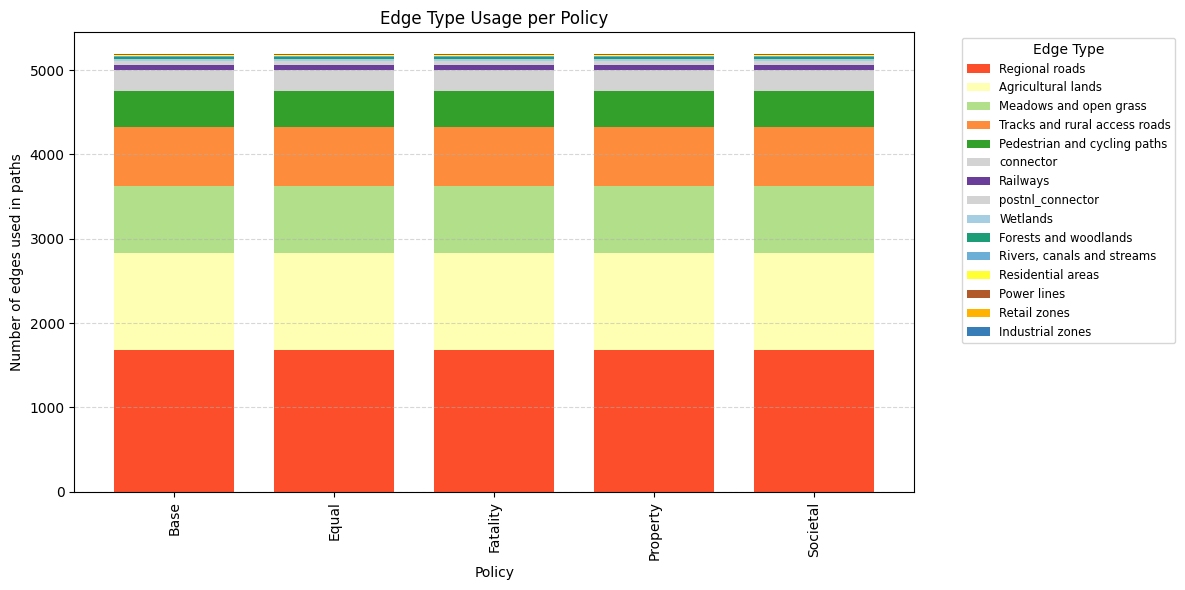

In [176]:
from collections import Counter

etype_counts = {}

for policy, results in policy_results.items():
    etypes = [etype for r in results for etype in r[-1]]  # r[-1] is de etype_array
    etype_counts[policy] = dict(Counter(etypes))

df_etypes = pd.DataFrame(etype_counts).fillna(0).astype(int)
print(df_etypes)
plot_policy_etypes_stacked_barplot(df_etypes, top_n=15)

## SA 2: Subjectieve beoordelingsfouten

In [177]:
df = pd.read_csv("/Users/cmartens/Documents/Thesis/model/risks/data/risk_analysis_v1.csv") 

In [ ]:
# drop last 3 rows 
df = df.drop(df.index[-3:])

In [ ]:
results_list = []
top5_sets = []

for _ in range(n_samples):
    sample_L = L_original.copy()
    for col in likelihood_cols:
        noise = np.random.choice([-1, 0, 1], size=len(df))
        sample_L[col] = (sample_L[col] + noise).clip(1, 5)

    # Varieer severities per domein
    Sf = (df["Sf"] + np.random.choice([-1, 0, 1], size=len(df))).clip(1, 5)
    Sp = (df["Sp"] + np.random.choice([-1, 0, 1], size=len(df))).clip(1, 5)
    Ss = (df["Ss"] + np.random.choice([-1, 0, 1], size=len(df))).clip(1, 5)

    # Risico's berekenen
    R_f = (Sf.to_numpy().reshape(-1, 1) * sample_L.to_numpy()).sum(axis=1)
    R_p = (Sp.to_numpy().reshape(-1, 1) * sample_L.to_numpy()).sum(axis=1)
    R_s = Ss.to_numpy()

    # Normalisatie
    R_f_norm = (R_f - R_f.min()) / (R_f.max() - R_f.min())
    R_p_norm = (R_p - R_p.min()) / (R_p.max() - R_p.min())
    R_s_norm = (R_s - R_s.min()) / (R_s.max() - R_s.min())

    risk = 0.4 * R_f_norm + 0.3 * R_p_norm + 0.3 * R_s_norm
    results_list.append(risk)

    top5 = df["area_type"].iloc[np.argsort(-risk)[:5]].tolist()
    top5_sets.append(top5)


In [43]:
# Analyse top-5
flat_top5 = [area for sublist in top5_sets for area in sublist]
top5_freq = Counter(flat_top5)
top5_df = pd.DataFrame(top5_freq.items(), columns=["Area", "Count"]).sort_values("Count", ascending=False)

print(top5_df.head(30))

                              Area  Count
4         Schools and universities    448
0   Living and residential streets    416
5                     Retail zones    406
8                Residential areas    287
3                 Commercial zones    193
12                       Hospitals    173
2                 Industrial zones    148
6                            Parks     99
9                   Cultural sites     80
10              Recreational zones     62
1                       Care homes     52
13                         Prisons     52
7                  Religious sites     41
14                  Regional roads     14
11    Pedestrian and cycling paths     12
15                    Power plants      8
16                      Cemeteries      8
17                         Bridges      1


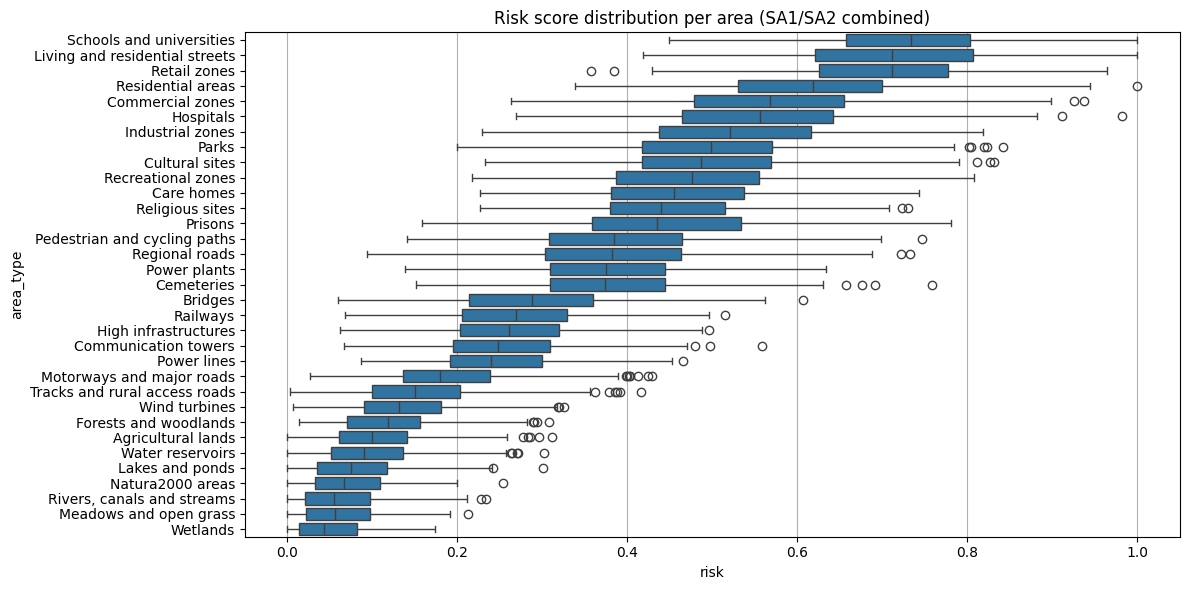

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

risk_array = np.array(results_list) 
risk_df = pd.DataFrame(risk_array, columns=df["area_type"])

# Melt naar long format
risk_long = risk_df.melt(var_name="area_type", value_name="risk")

# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=risk_long, x="risk", y="area_type", order=risk_long.groupby("area_type").risk.mean().sort_values(ascending=False).index)
plt.title("Risk score distribution per area (SA1/SA2 combined)")
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


dit was de spreiding normaal vs na SA

focus op hoe de routes anders worden

op een area SA 

paar uitlichten, wegen, care homes, retail areas. 

In [56]:
rankings = np.argsort(-risk_array, axis=1)  # hoge risico = lage rangnummer
ranks_df = pd.DataFrame(rankings, columns=[f"rank_{i}" for i in range(risk_array.shape[1])])
rank_std = np.std(rankings, axis=0)
rank_mean = np.mean(rankings, axis=0)

ranking_stats = pd.DataFrame({
    "area_type": df["area_type"],
    "mean_rank": rank_mean,
    "std_rank": rank_std
}).sort_values("mean_rank")

ranking_stats.sort_values("mean_rank", ascending=False, inplace=True)

In [57]:
ranking_stats

,area_type,mean_rank,std_rank
32,Natura2000 areas,21.738,4.448073
31,Parks,20.914,6.220177
30,Cemeteries,20.728,6.402032
9,Communication towers,20.080,9.535072
8,Power plants,19.786,9.898293
29,Cultural sites,19.376,7.510168
7,Power lines,19.344,9.284485
5,Railways,19.150,8.284172
10,Wind turbines,19.002,10.220274
28,Religious sites,18.722,7.599258


In [58]:
from collections import defaultdict

topN_counts = defaultdict(lambda: [0]*len(df))

for risk in results_list:
    sorted_idx = np.argsort(-risk)
    for n in [3, 5, 10]:
        for i in sorted_idx[:n]:
            topN_counts[n][i] += 1

topN_df = pd.DataFrame({
    "area_type": df["area_type"],
    "Top 3": topN_counts[3],
    "Top 5": topN_counts[5],
    "Top 10": topN_counts[10]
})


In [59]:
topN_df

,area_type,Top 3,Top 5,Top 10
0,Motorways and major roads,0,0,0
1,Regional roads,1,14,122
2,Tracks and rural access roads,0,0,0
3,Living and residential streets,310,416,488
4,Pedestrian and cycling paths,3,12,112
5,Railways,0,0,4
6,Bridges,0,1,16
7,Power lines,0,0,1
8,Power plants,0,8,87
9,Communication towers,0,0,1
